## Importing libraries

In [1]:
from datetime import datetime
import os
import sys

In [2]:
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
print(module_path)

c:\Github\ECAM\machine_learning\AI-Project-Smile


In [3]:
from datetime import datetime
from keras.optimizers import Adam
from neural_network.src.data_preprocessing import DataPreProcessor
from neural_network.src.cnn_model import CNNModel

## Initialise parameters dataset

In [4]:
# train_dir = '../dataset/fer2013/train/'
# test_dir = '../dataset/fer2013/test/'

# row, col = 48, 48
# classes = 7

train_dir = 'neural_network/dataset/affectnet8/train/'
test_dir = 'neural_network/dataset/affectnet8/val/'

row, col = 224, 224
classes = 8

## Preprocessing the Data

In [5]:
data_processor = DataPreProcessor(images_train_dir=train_dir, images_test_dir=test_dir)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### Get data set count training and testing

In [6]:
data_processor.get_train_count

,angry,disgust,fear,happy,neutral,sad,surprise
train,3995,436,4097,7215,4965,4830,3171


In [7]:
data_processor.get_test_count

,angry,disgust,fear,happy,neutral,sad,surprise
test,958,111,1024,1774,1233,1247,831


### Plot number of images in dataset

In [8]:
data_processor.plot_image_count()

## Sample images

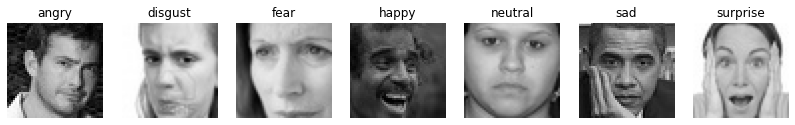

In [9]:
data_processor.plot_sample_images()

### Training Data post Process

In [10]:
training_set = data_processor.get_train_set
training_set

### Test Set post Process

We don't want to modify our images. We simply want to rescale them.

In [11]:
test_set = data_processor.get_test_set
test_set

In [12]:
data_processor.get_emotions_dataset

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

## Build Model

### Get and Compile Model

In [13]:
opt = Adam(lr=0.0001, decay=10e-6)
cnn_model = CNNModel(optimiser=opt)
cnn_model.compute_model(model_choice="vgg_net")


### Model Summary

#### Model Summary

In [14]:
cnn_model.get_model_summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 128)       5

#### Model Diagram

In [15]:
date = datetime.now()
cnn_model.generate_model_plot(filename='neural_network/models/' + date.strftime('%d-%m-%yT%Hh%Mm%Sd'))

FileNotFoundError: [Errno 2] No such file or directory: 'neural_network/models/08-04-21T02h53m17d.png'

### Train model

In [33]:
# possible to modify steps per epoch and validation steps
cnn_model.train_model(training_set=training_set, test_set=test_set)

Epoch 1/60


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential/conv2d/Conv2D (defined at c:\Github\ECAM\machine_learning\AI-Project-Smile\neural_network\src\cnn_model.py:91) ]] [Op:__inference_train_function_4392]

Function call stack:
train_function


## Results

### Loss and Accuracy plots

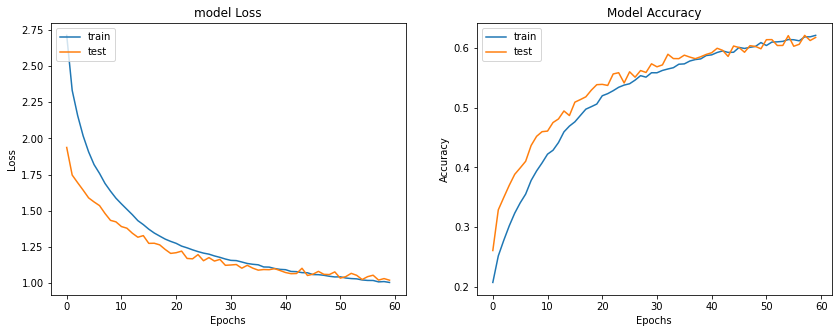

In [63]:
# cnn_model.plot_accuracy_and_loss_plotly()

cnn_model.plot_accuracy_and_loss_plt()

### Loss and Accuracy final values

cnn_model.evaluate_model(training_set=training_set, test_set=test_set)

In [64]:
cnn_model.evaluate_model(training_set=training_set, test_set=test_set)

113/113 [==============================] - 3s 23ms/step - loss: 1.0259 - accuracy: 0.6149

## Making a single Prediction

In [65]:
cnn_model.predict('../dataset/fer2013/test/angry/PrivateTest_88305.jpg',
                        data_processor.get_emotions_dataset,
                        data_processor.get_emotions_indices)

ValueError: in user code:

    c:\github\ecam\machine_learning\ai-project-smile\venv\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    c:\github\ecam\machine_learning\ai-project-smile\venv\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\github\ecam\machine_learning\ai-project-smile\venv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\github\ecam\machine_learning\ai-project-smile\venv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\github\ecam\machine_learning\ai-project-smile\venv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\github\ecam\machine_learning\ai-project-smile\venv\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    c:\github\ecam\machine_learning\ai-project-smile\venv\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    c:\github\ecam\machine_learning\ai-project-smile\venv\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\github\ecam\machine_learning\ai-project-smile\venv\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape (None, 48, 48, 3)
